# Subclustering of head ectoderm in Set 2

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set2/seu_HQC2_Set2.obj')
seu_HQC

An object of class Seurat 
28364 features across 4897 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


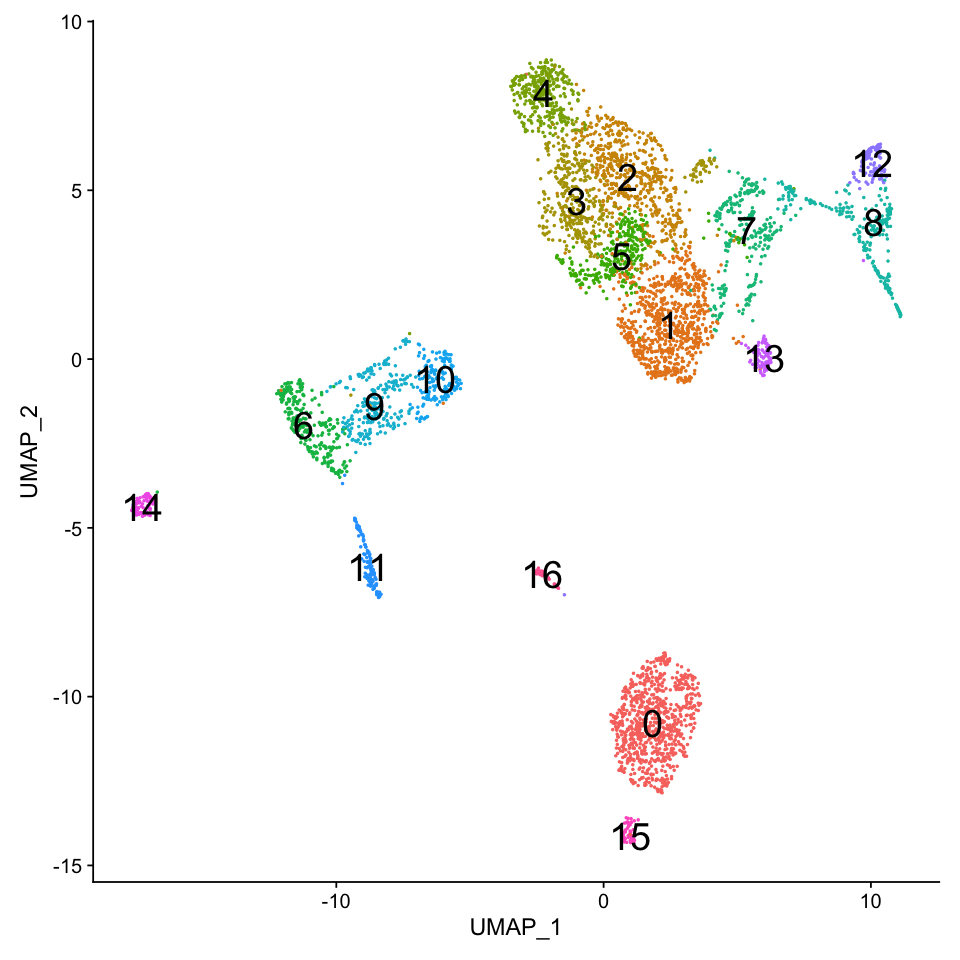

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

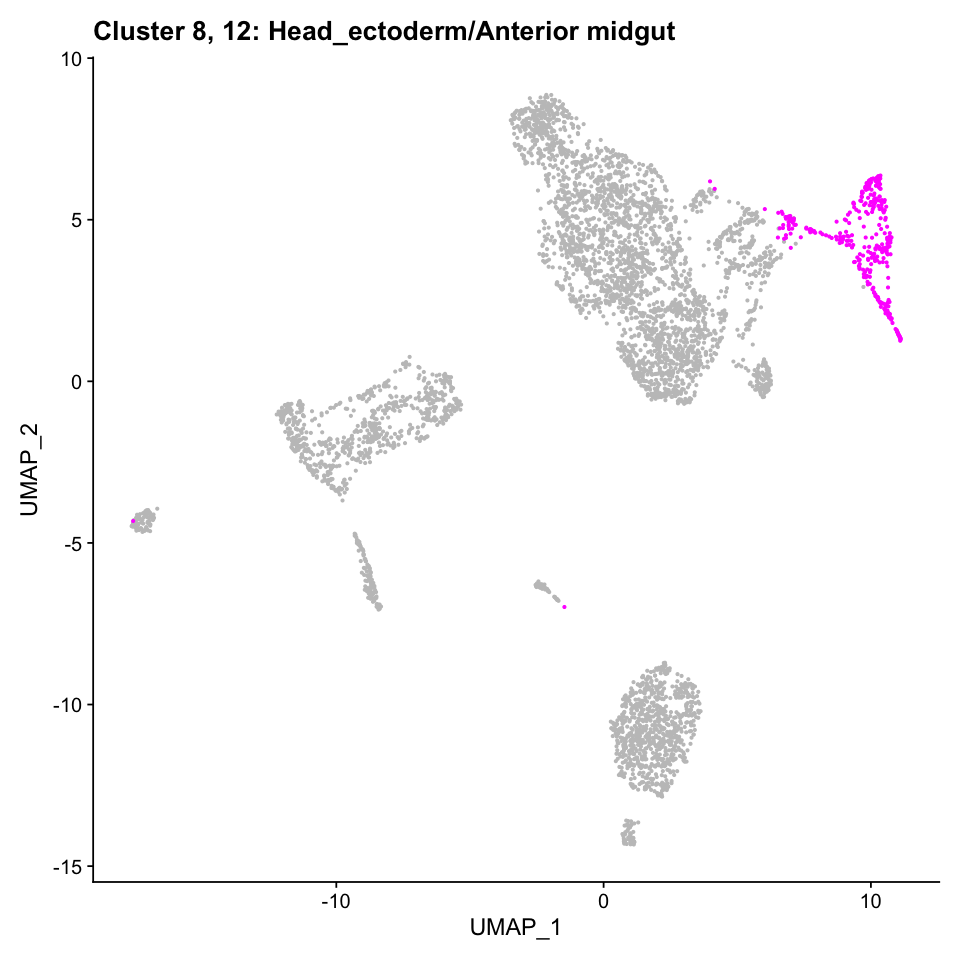

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(8,12))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 8, 12: Head_ectoderm/Anterior midgut')

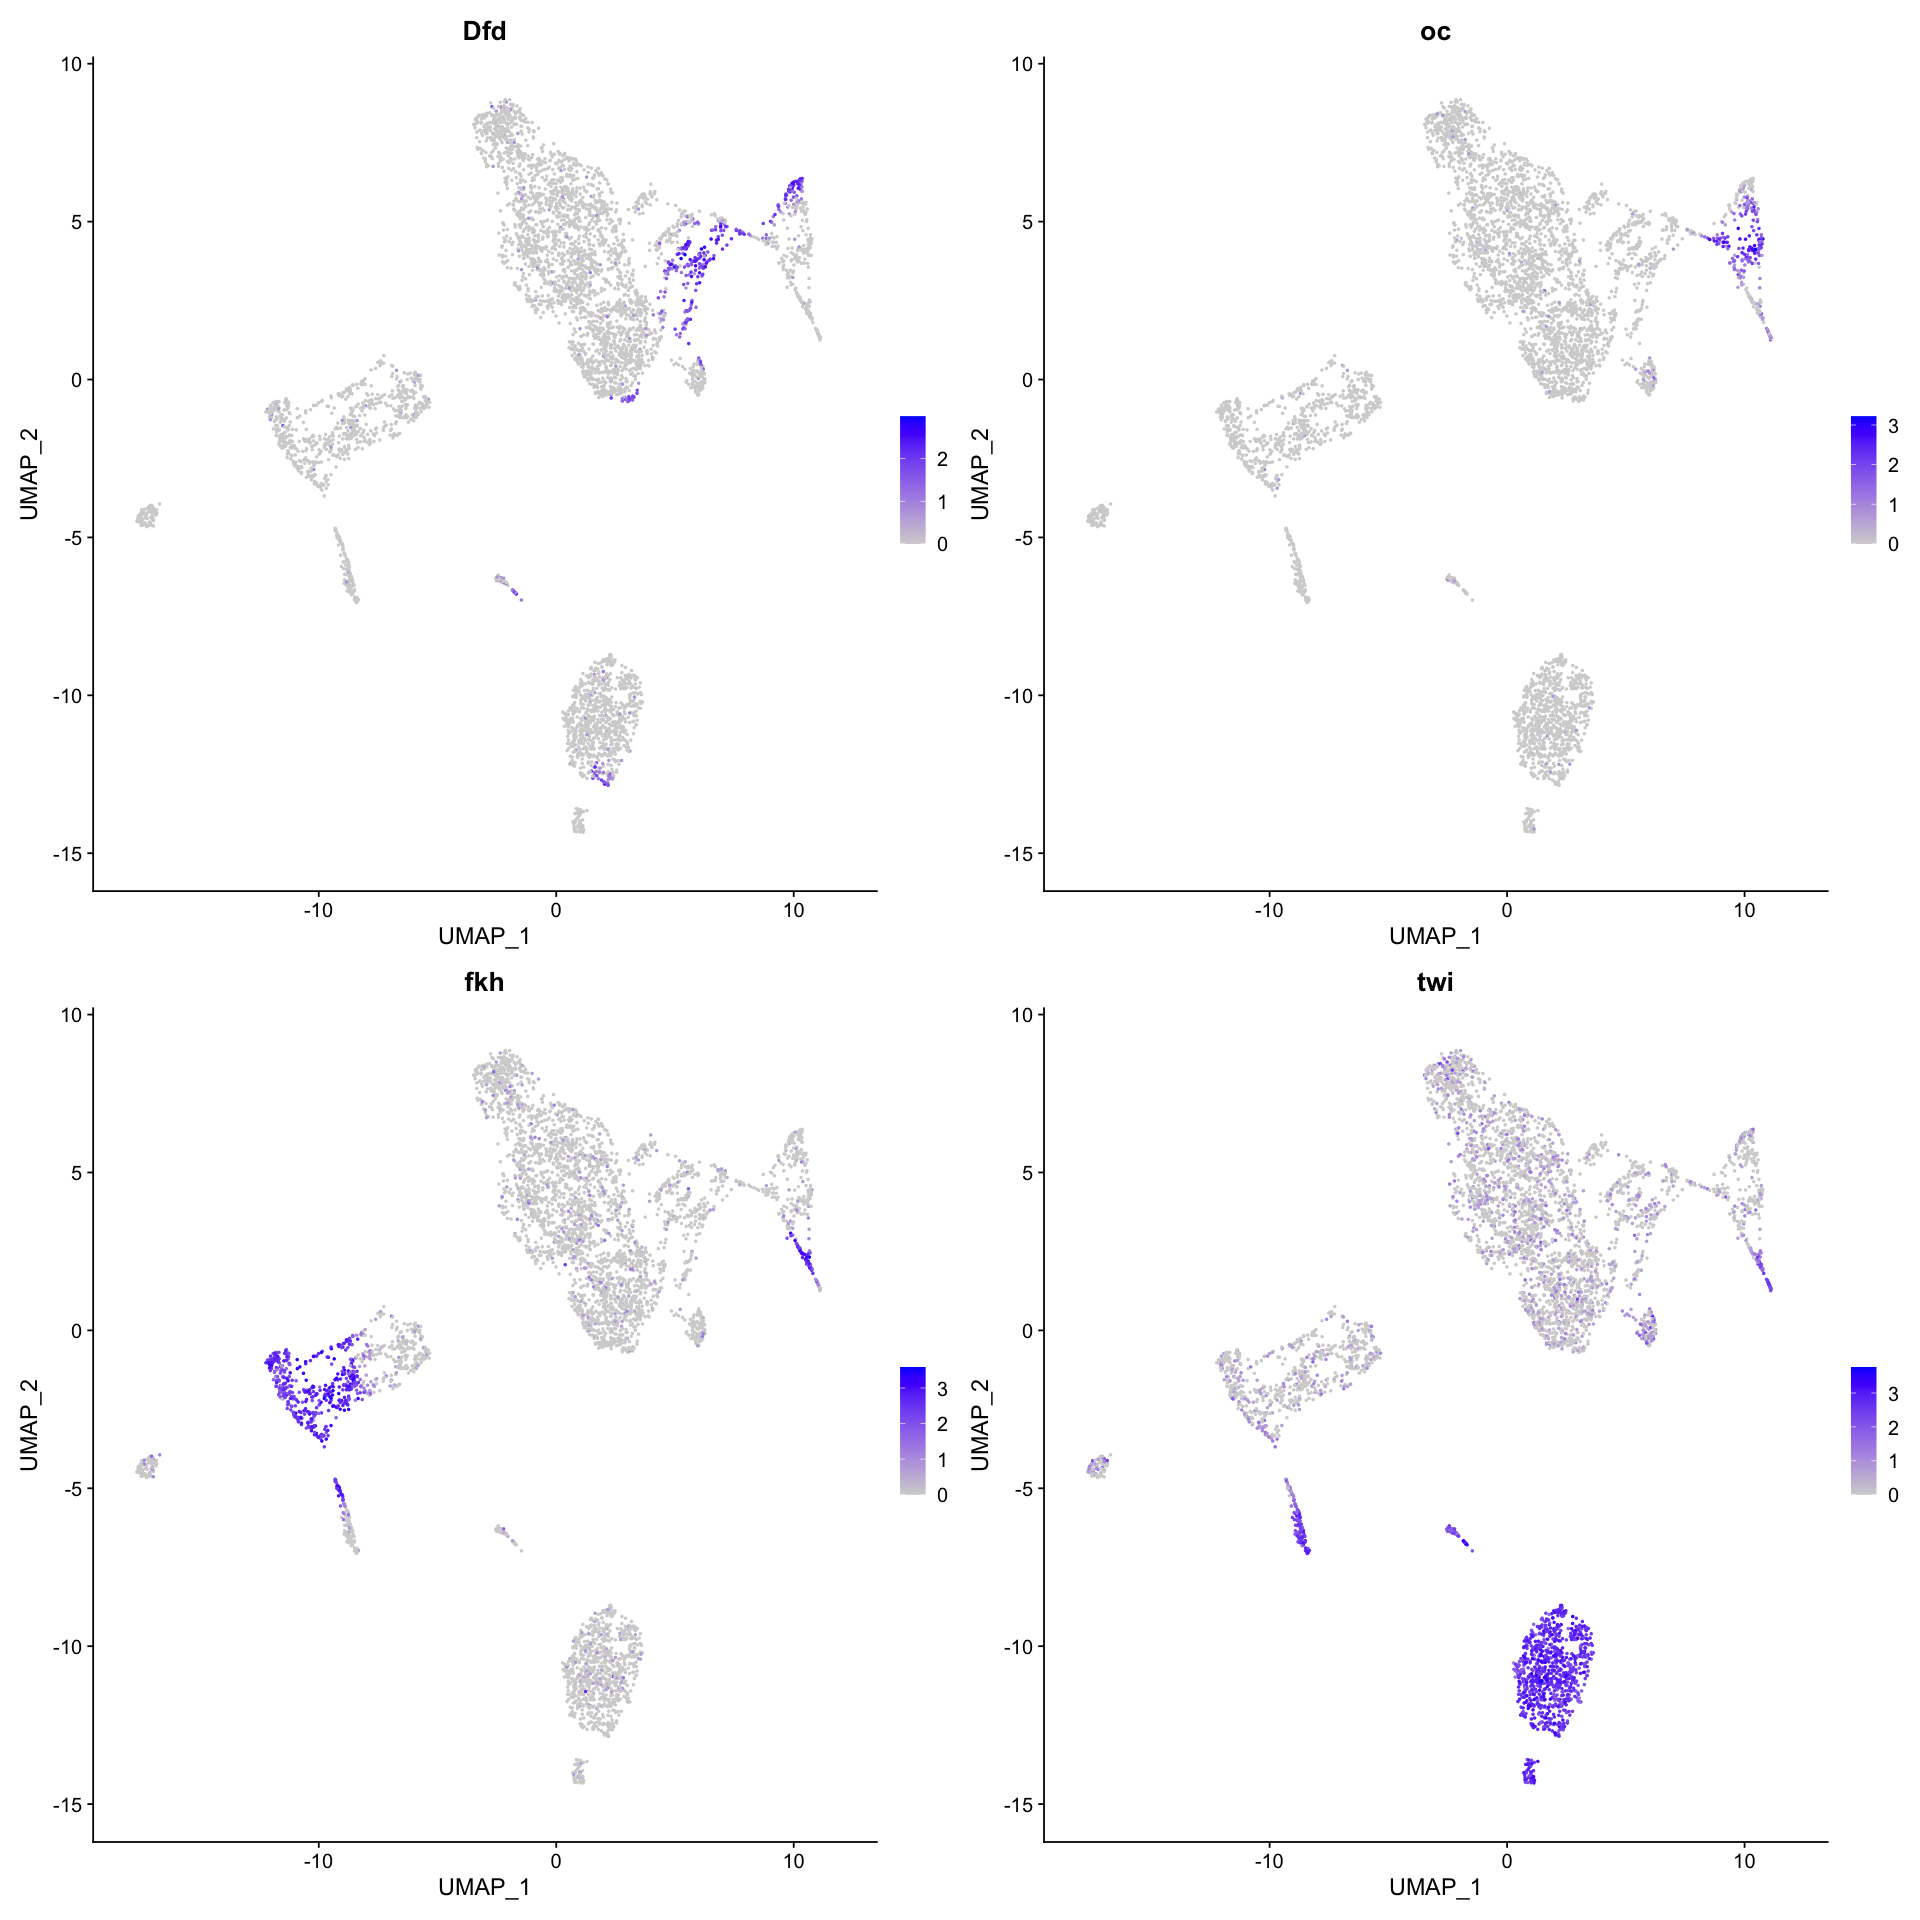

In [5]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, features = c('Dfd','oc','fkh','twi'))

In [6]:
seu.head <- subset(seu_HQC, idents = c(8,12))
seu.head

An object of class Seurat 
28364 features across 357 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [7]:
seu.head$cluster.allcell <- seu.head$seurat_clusters

## clustering
Num of cells < 500  
Skipping re-normalize

PC_ 1 
Positive:  Antp, ImpL2, tsh, Ubx, ths, lncRNA:bxd, CadN, mid, CG34224, CG13217 
	   hll, run, sna, zfh1, Cys, ftz, wntD, twi, Abd-B, ich 
	   sprt, phu, 5-HT2A, salm, abd-A, Kr, eve, Mef2, Ilp4, en 
Negative:  CG3502, CG42342, oc, grn, cnc, knrl, Dll, Optix, fj, gt 
	   Ance, Dscam2, kn, kni, btd, CG14204, CG13427, ImpE2, nrm, Oaz 
	   CG43085, PGRP-SC2, Doc1, lncRNA:CR43302, Lim1, Doc3, Dfd, mirr, ems, lov 
PC_ 2 
Positive:  knrl, kni, CG3502, kn, sog, Mdr49, Optix, Lim1, Hsp83, ImpE2 
	   Ndae1, fkh, croc, ovo, gt, ltl, SoxN, Ldh, Blimp-1, hkb 
	   Ilp4, D, cnc, btd, pros, CG11905, ab, CG7900, nrm, oc 
Negative:  Ance, Dll, Doc1, tup, egr, cv-2, grn, Doc3, bnl, mirr 
	   lov, Oaz, Doc2, Sema5c, dap, Alk, scyl, toc, rho, prage 
	   salm, Ama, CG42342, chrb, rst, kay, hbs, Fs, BobA, Dscam2 
PC_ 3 
Positive:  ImpE2, Optix, CG3502, Mdr49, fkh, mirr, rib, ltl, Ndae1, CG42342 
	   Ldh, hkb, croc, ab, CG16758, edl, so, Ilp4, twi, srp 
	   Hsp83, sna, Act87E, SNCF, Myc, CG7029, CG1190

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357
Number of edges: 9996

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7400
Number of communities: 6
Elapsed time: 0 seconds


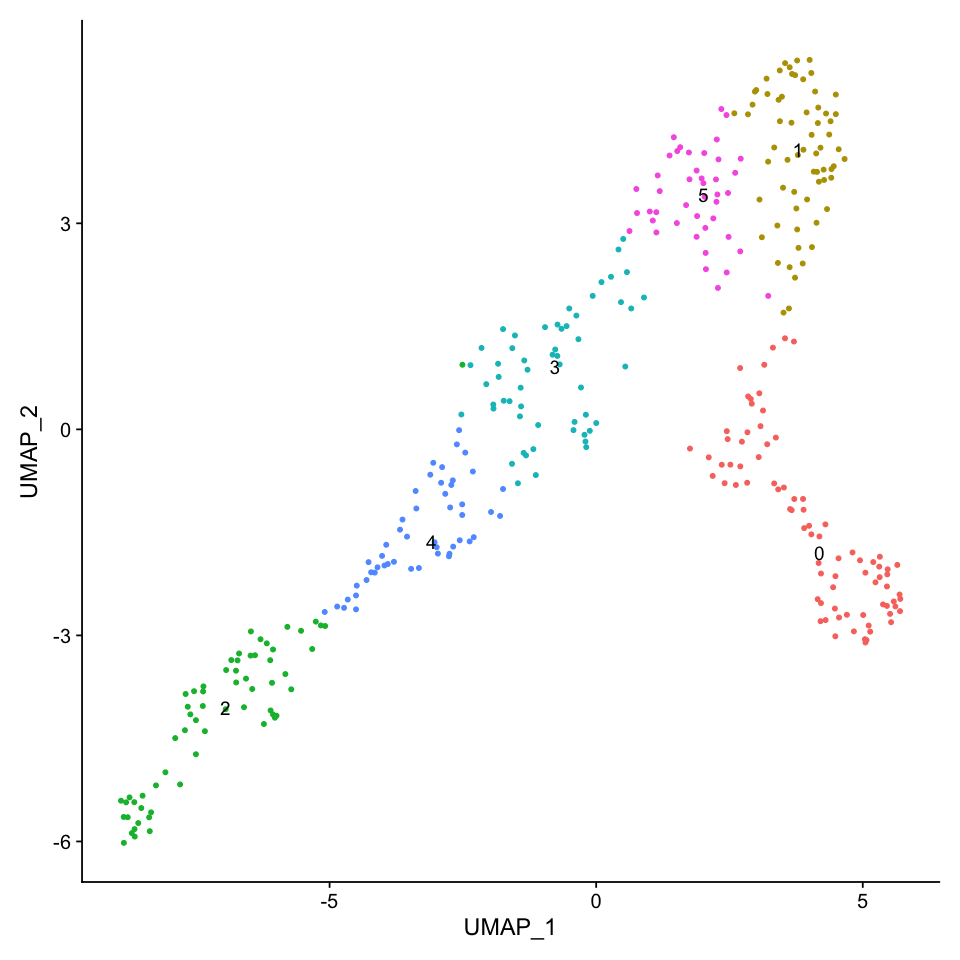

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.head <- RunPCA(seu.head)
seu.head <- RunUMAP(seu.head, dims = 1:30)
seu.head <- FindNeighbors(seu.head, dims = 1:30)
seu.head <- FindClusters(seu.head)
DimPlot(seu.head, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357
Number of edges: 9996

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3105
Number of communities: 16
Elapsed time: 0 seconds


2 singletons identified. 14 final clusters.



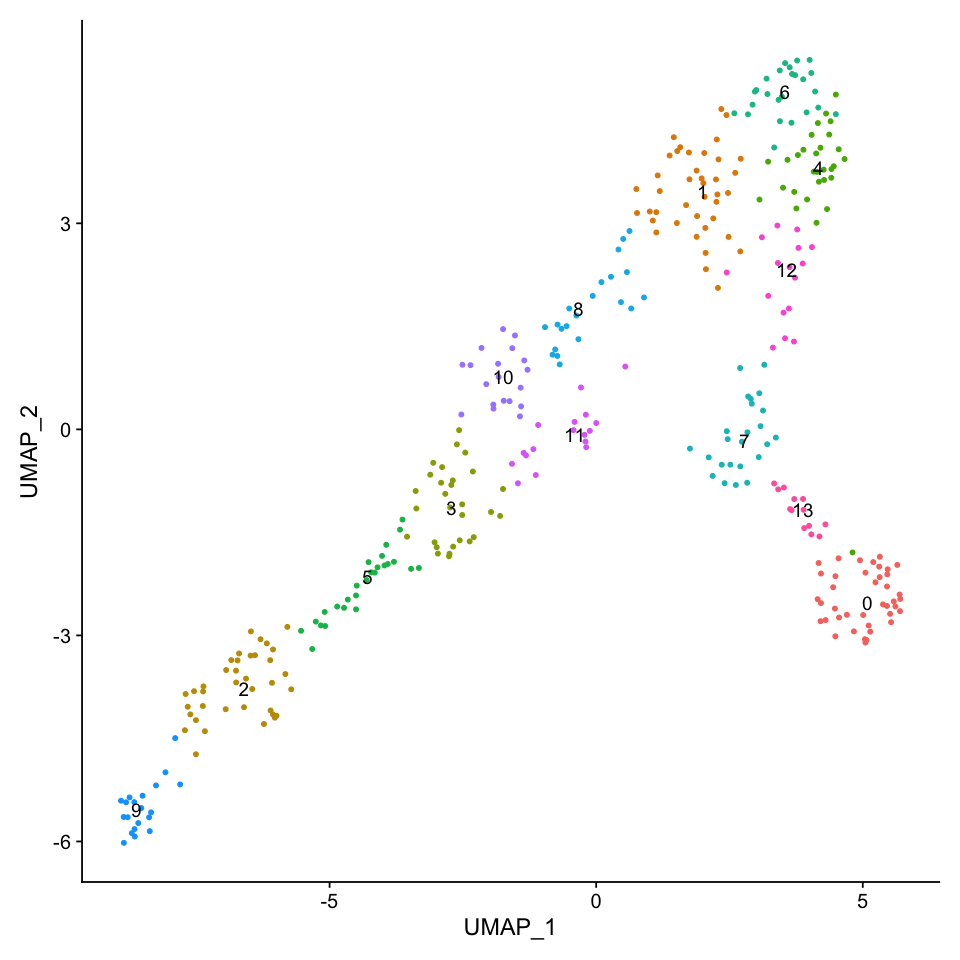

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.head <- FindClusters(seu.head, resolution=4.5)
DimPlot(seu.head, reduction = 'umap', label = TRUE) + NoLegend()

In [10]:
levels(seu.head) <- c(0,13,4,6,1,12,7,8,11,10,3,5,2,9)
all.markers.head <- FindAllMarkers(object = seu.head, only.pos = TRUE)
nrow(all.markers.head)
all.markers.head.top10 <- all.markers.head %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.head.top10)

Calculating cluster 0

Calculating cluster 13

Calculating cluster 4

Calculating cluster 6

Calculating cluster 1

Calculating cluster 12

Calculating cluster 7

Calculating cluster 8

Calculating cluster 11

Calculating cluster 10

Calculating cluster 3

Calculating cluster 5

Calculating cluster 2

Calculating cluster 9



[1] 1920

[1] 140

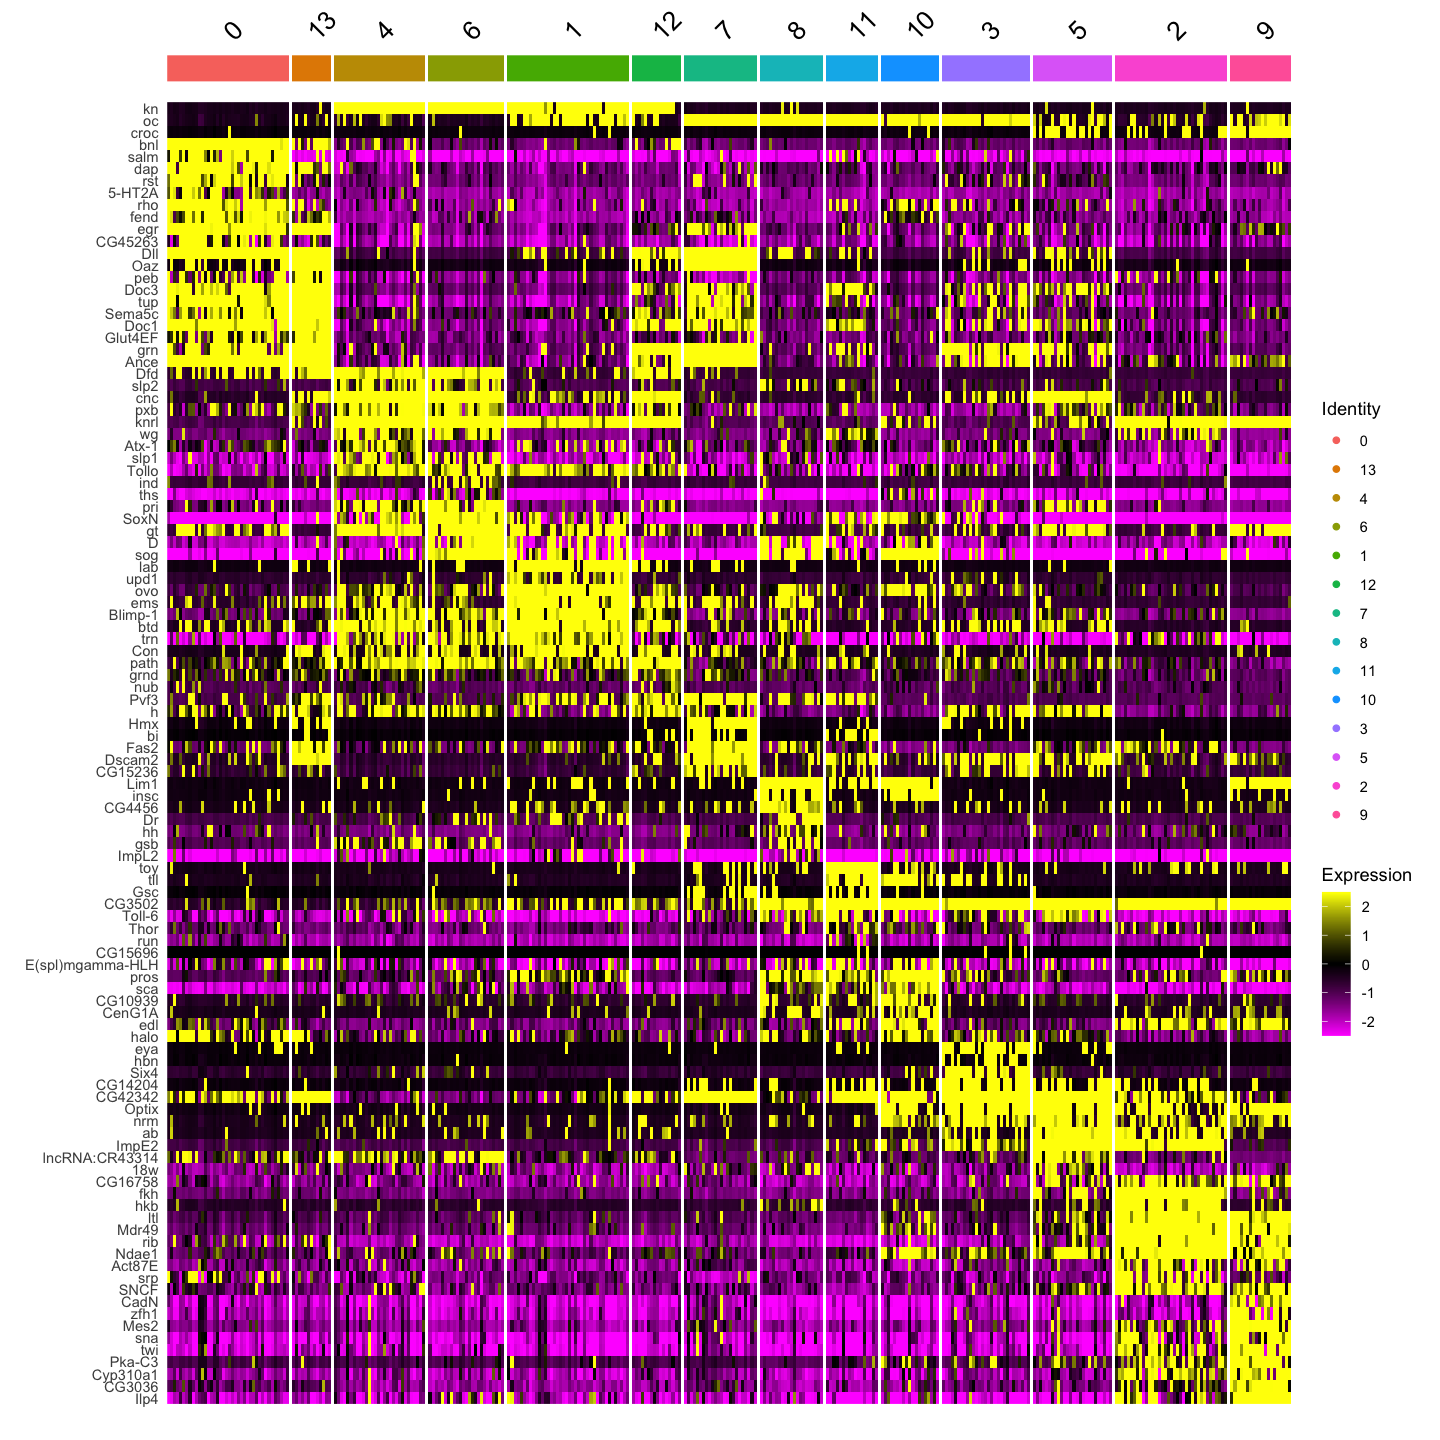

In [11]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.head, features = c('kn','oc','croc',all.markers.head.top10$gene))

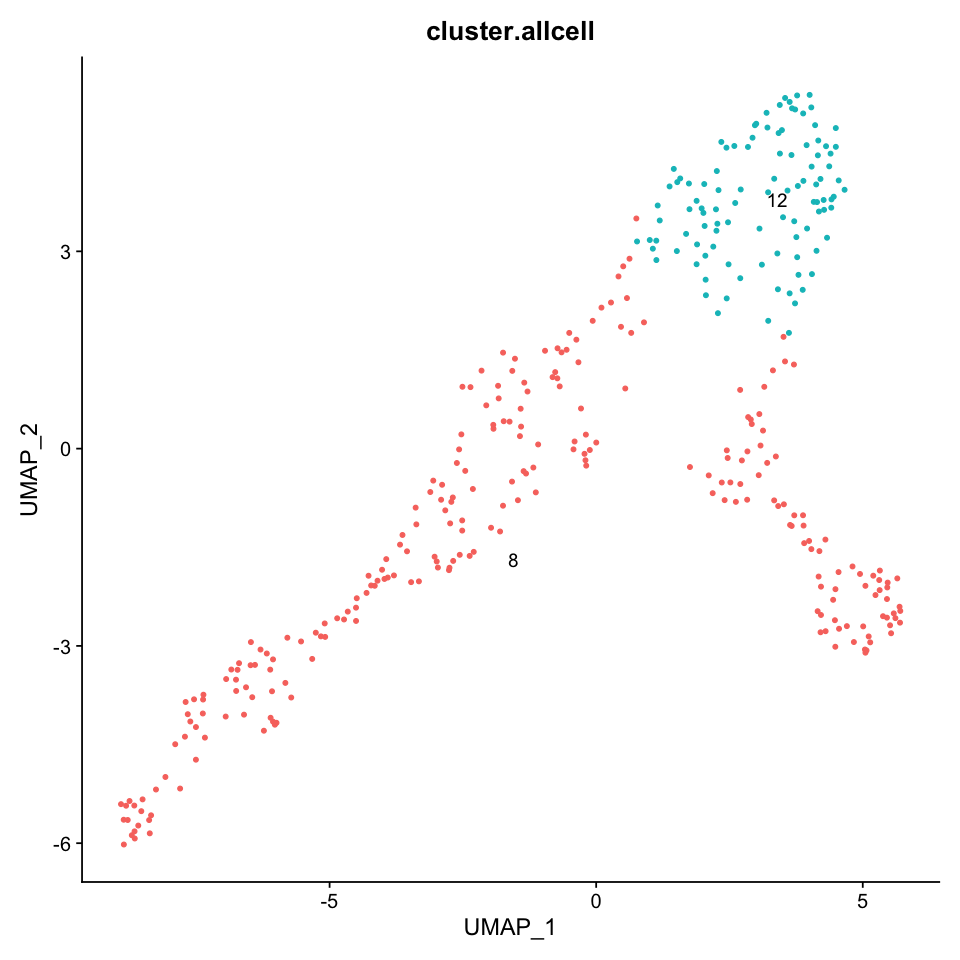

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.head, reduction = 'umap', label = TRUE, group.by = 'cluster.allcell') + NoLegend()

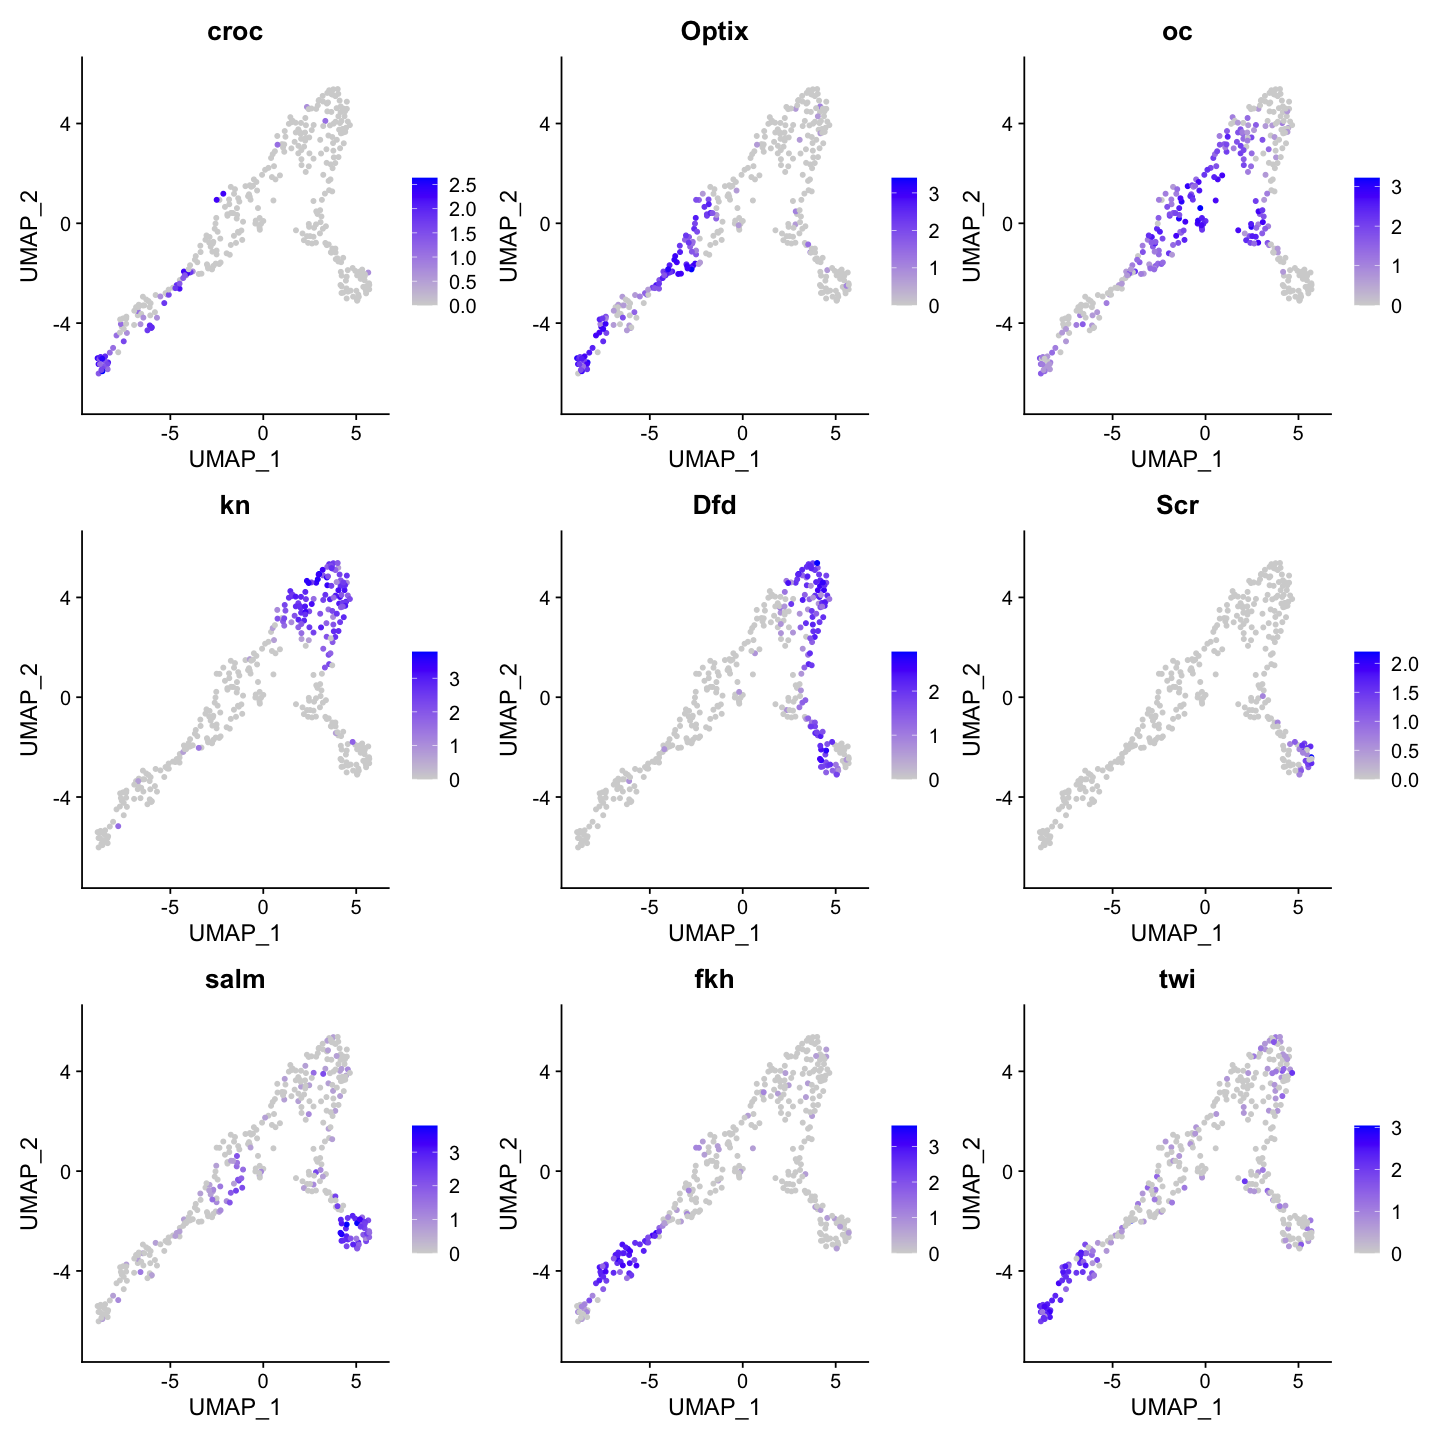

In [13]:
options(repr.plot.width=12, repr.plot.height=12)
FeaturePlot(seu.head, reduction = "umap", features = c("croc","Optix","oc","kn","Dfd","Scr","salm","fkh","twi"), 
            pt.size = 1,  ncol = 3)

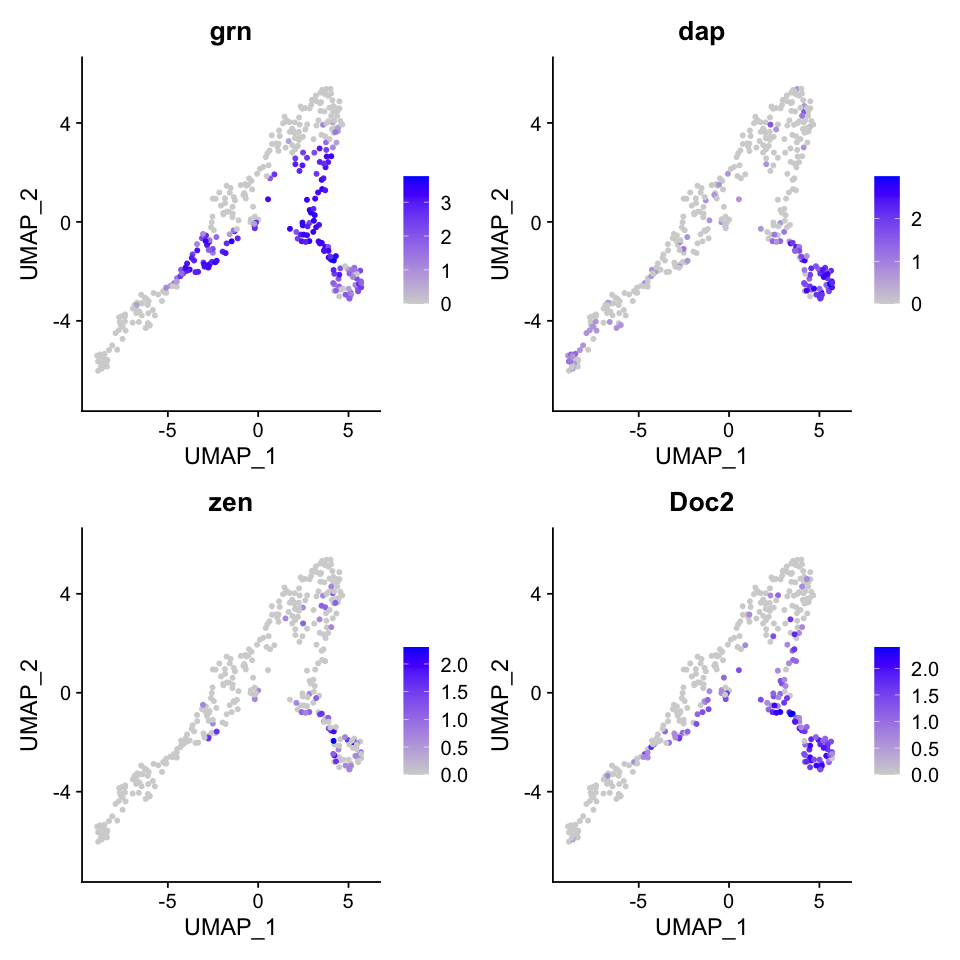

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("grn","dap","zen","Doc2"), 
            pt.size = 1,  ncol = 2)

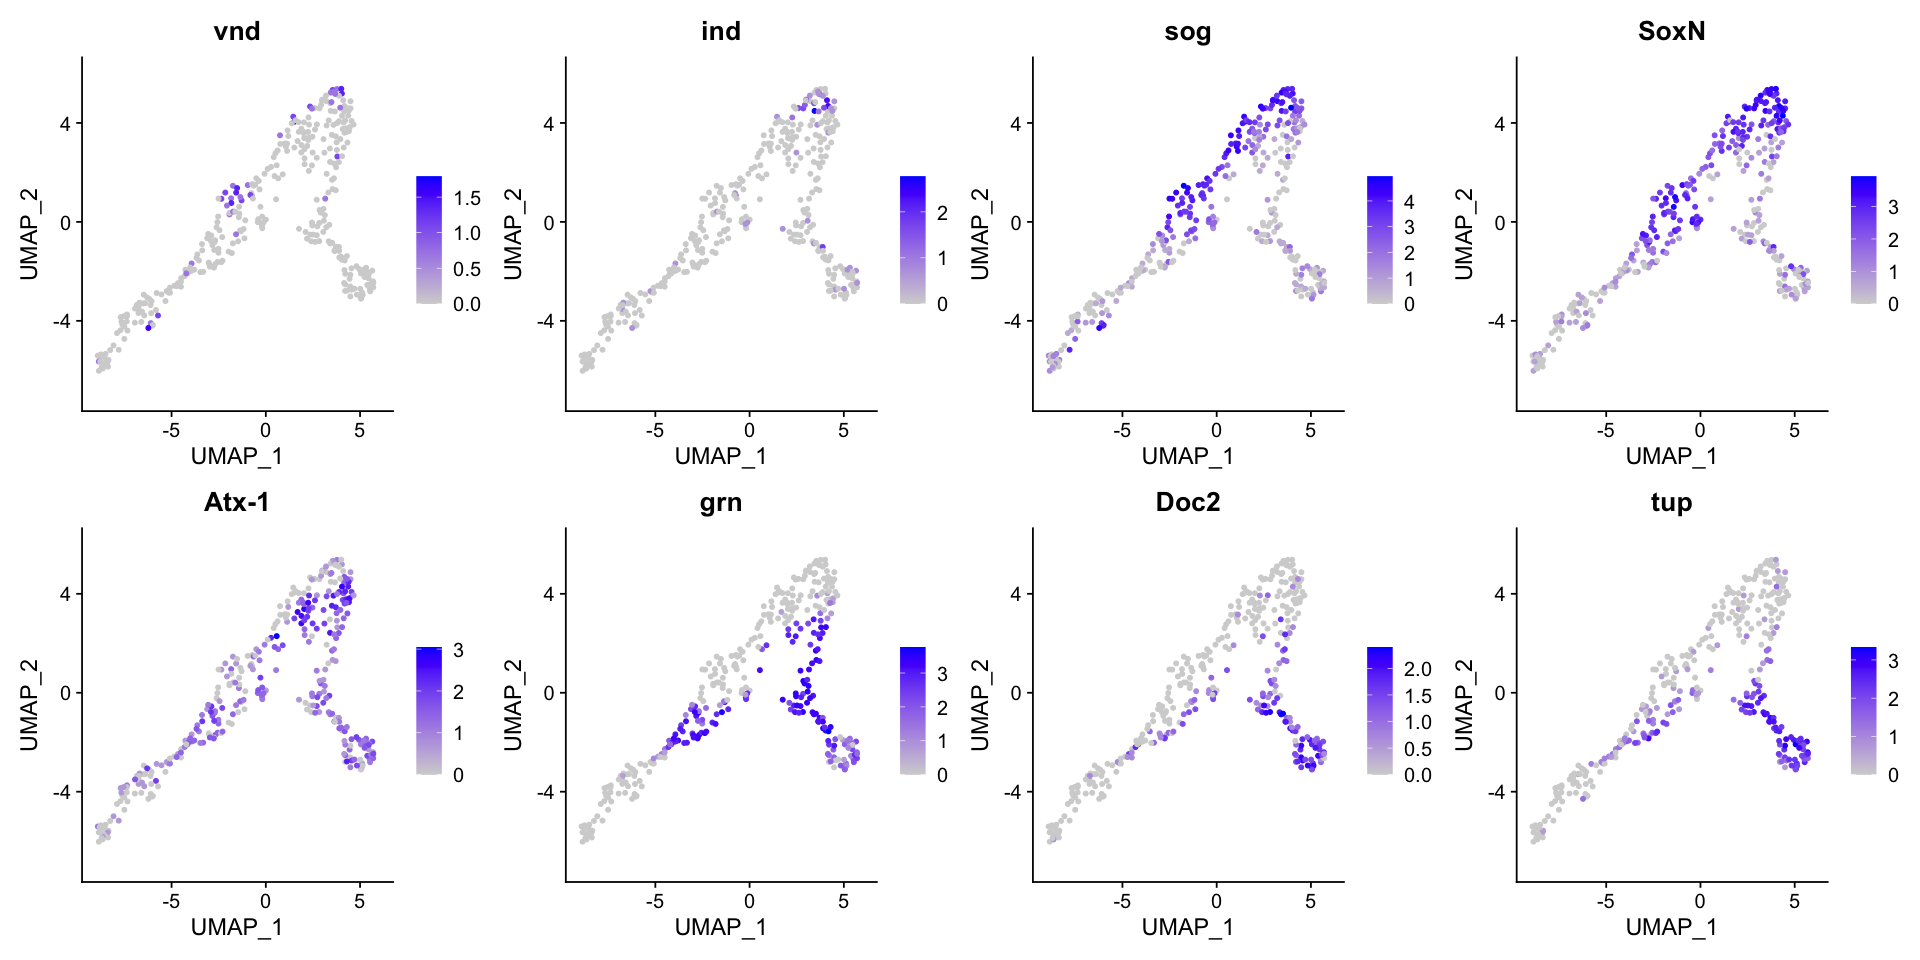

In [15]:
#DV-marker genes
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("vnd", "ind","sog", "SoxN",
                                                           "Atx-1", "grn", "Doc2","tup"), pt.size = 1,  ncol = 4)

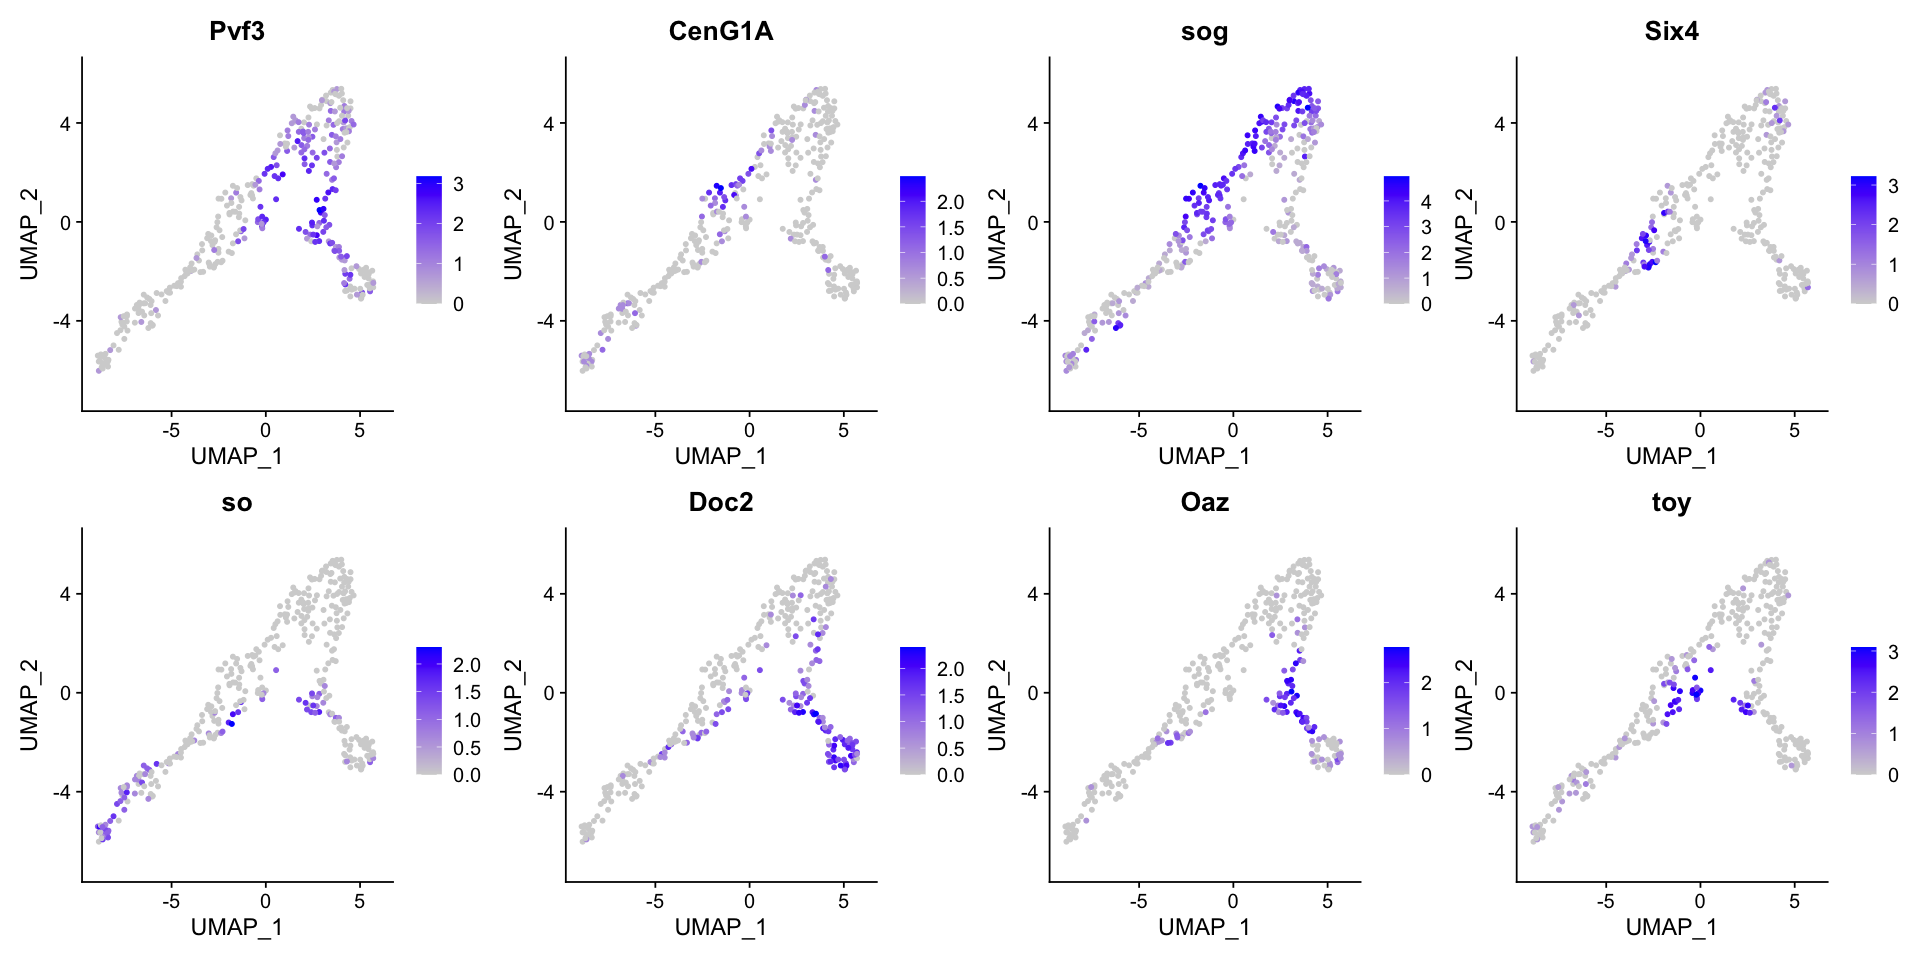

In [16]:
#other marker genes
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu.head, reduction = "umap", features = c("Pvf3", "CenG1A","sog", "Six4", "so", "Doc2", "Oaz", "toy"), 
            pt.size = 1,  ncol = 4)

## Add annotation 

In [17]:
manual_id <- as.data.frame(seu.head$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)

manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                     "0"="amnioserosa_anterior", #salm+, zen+
                                     "13" = "ectoderm_head_Dfd_Oaz", #Oaz+, 
                                     "4"= "ectoderm_lateral_NE_PS0", #Dfd+, kn+, Atx-1+, SoxN+
                                     "6" = "ectoderm_medial_NE_PS0", #Dfd+, kn+, sog+
                                     "1" = "ectoderm_head_kn", #Dfd-, kn+, Pvf3-
                                     "12" = "ectoderm_DE_PS0", #Dfd-, kn+, Pvf3+
                                     "7" = "ectoderm_head_oc_Oaz", #oc+, Oaz, kn-
                                     "8" = "ectoderm_head_oc_CenG1A", #oc+, CenG1A+, Optix-
                                     "11" = "ectoderm_head_oc_toy", #oc+, toy+
                                     "10" = "ectoderm_head_Optix_sog",#oc+, Optix+, sog+, CenG1A+, 
                                     "3" = "ectoderm_head_Optix_Six4", #oc+, Optix+, Six4+
                                     "5" = "ectoderm_head_croc", #croc+,srp-
                                     "2" = "endoderm_antMG", #fkh+,hkb+, srp+,  CadN-
                                     "9" = "mesoderm_head", #fkh-, hkb-, srp-, CadN+
                                     )

head(manual_id)

manual_ID
AAACCCACAAGTGATA 8        
AAAGGGCGTCCATACA 0        
AAAGTCCCATACCGTA 3        
AACAACCTCTTCGTGC 6        
AACCATGCAAATGGCG 4        
AACCCAAGTTCTCGTC 6

manual_ID               
AAACCCACAAGTGATA ectoderm_head_oc_CenG1A 
AAAGGGCGTCCATACA amnioserosa_anterior    
AAAGTCCCATACCGTA ectoderm_head_Optix_Six4
AACAACCTCTTCGTGC ectoderm_medial_NE_PS0  
AACCATGCAAATGGCG ectoderm_lateral_NE_PS0 
AACCCAAGTTCTCGTC ectoderm_medial_NE_PS0

In [18]:
seu.head$manual_ID <- manual_id$manual_ID

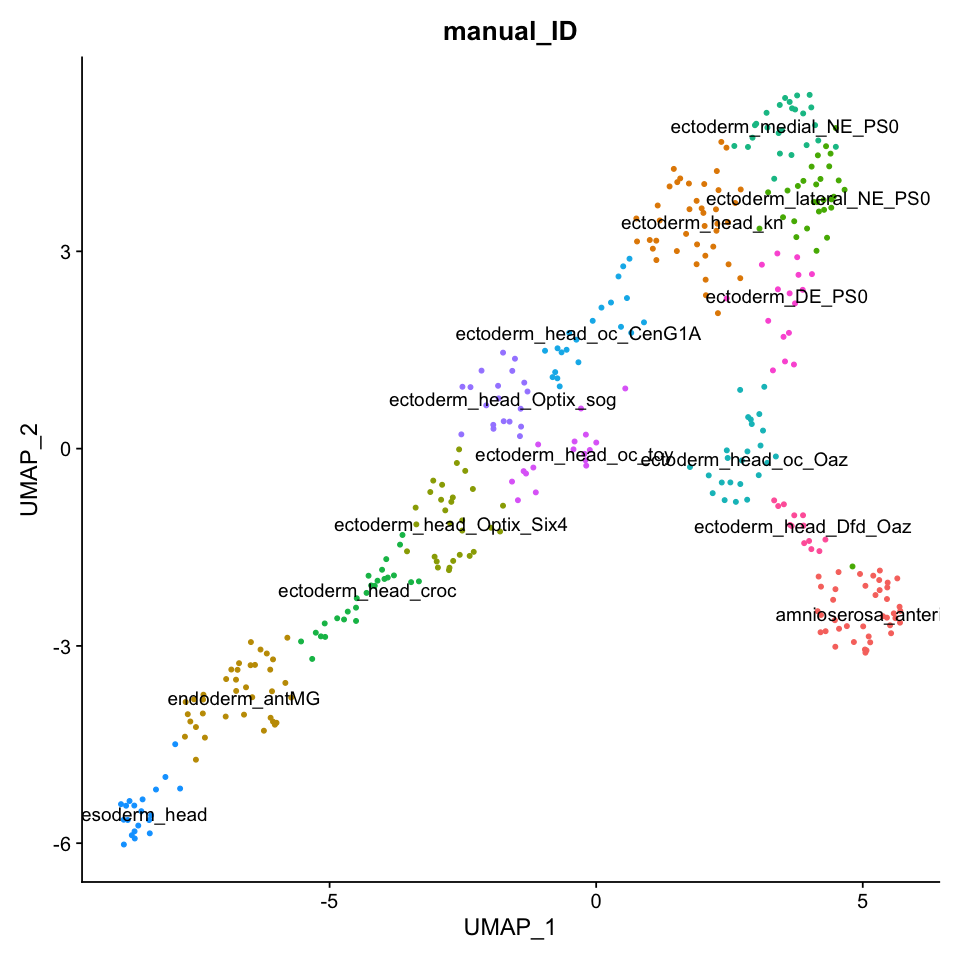

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.head, reduction = 'umap', label = TRUE, group.by='manual_ID') + NoLegend()

In [20]:
Idents(seu.head) <- seu.head$manual_ID
levels(seu.head) <- c('amnioserosa_anterior',
                      'ectoderm_DE_PS0','ectoderm_lateral_NE_PS0','ectoderm_medial_NE_PS0',
                      'ectoderm_head_kn','ectoderm_head_Dfd_Oaz',
                      'ectoderm_head_oc_Oaz','ectoderm_head_oc_CenG1A',
                      "ectoderm_head_oc_toy",'ectoderm_head_Optix_sog',
                      'ectoderm_head_Optix_Six4','ectoderm_head_croc',
                      'endoderm_antMG','mesoderm_head')
all.markers.head <- FindAllMarkers(object = seu.head, only.pos = TRUE)
nrow(all.markers.head)
all.markers.head.top10 <- all.markers.head %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.head.top10)

Calculating cluster amnioserosa_anterior

Calculating cluster ectoderm_DE_PS0

Calculating cluster ectoderm_lateral_NE_PS0

Calculating cluster ectoderm_medial_NE_PS0

Calculating cluster ectoderm_head_kn

Calculating cluster ectoderm_head_Dfd_Oaz

Calculating cluster ectoderm_head_oc_Oaz

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_oc_toy

Calculating cluster ectoderm_head_Optix_sog

Calculating cluster ectoderm_head_Optix_Six4

Calculating cluster ectoderm_head_croc

Calculating cluster endoderm_antMG

Calculating cluster mesoderm_head



[1] 1920

[1] 140

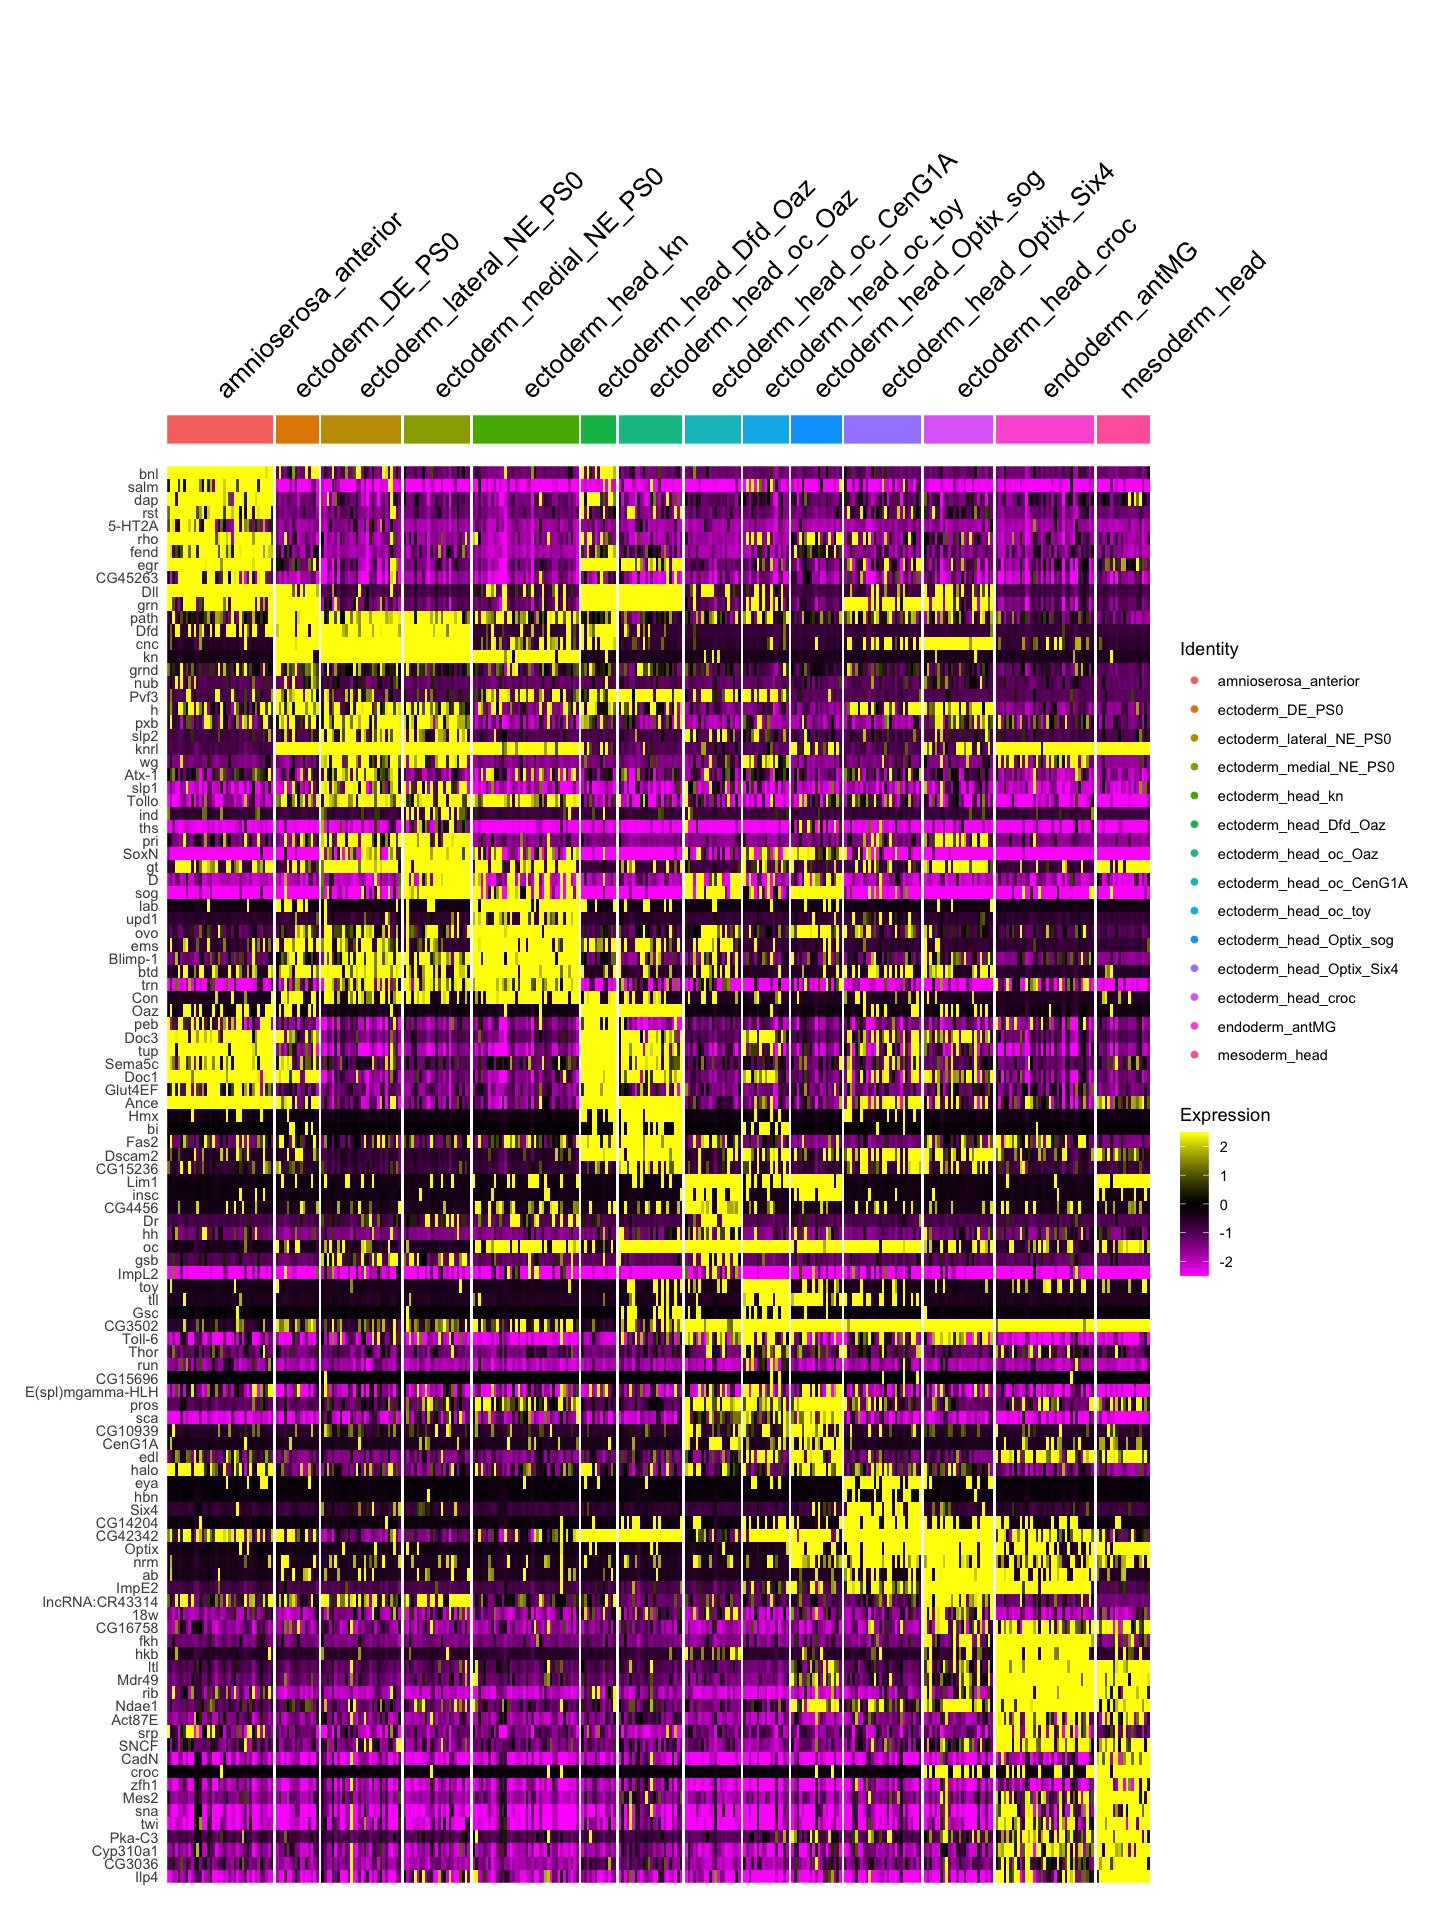

In [21]:
options(repr.plot.width=12, repr.plot.height=16)
DoHeatmap(seu.head, features = c(all.markers.head.top10$gene))

Saving 7 x 7 in image



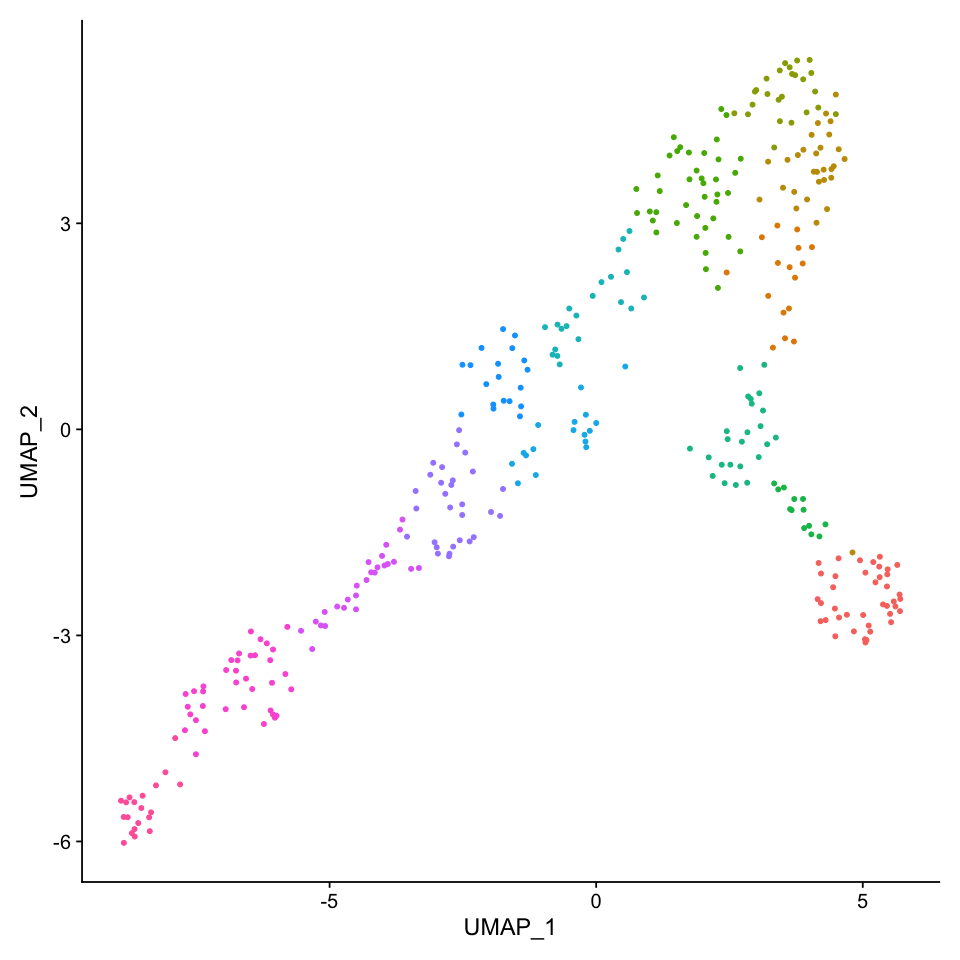

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.head, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/03_head_subclutering_Set2/head_umap1.eps", dpi = 300)

Saving 7 x 7 in image



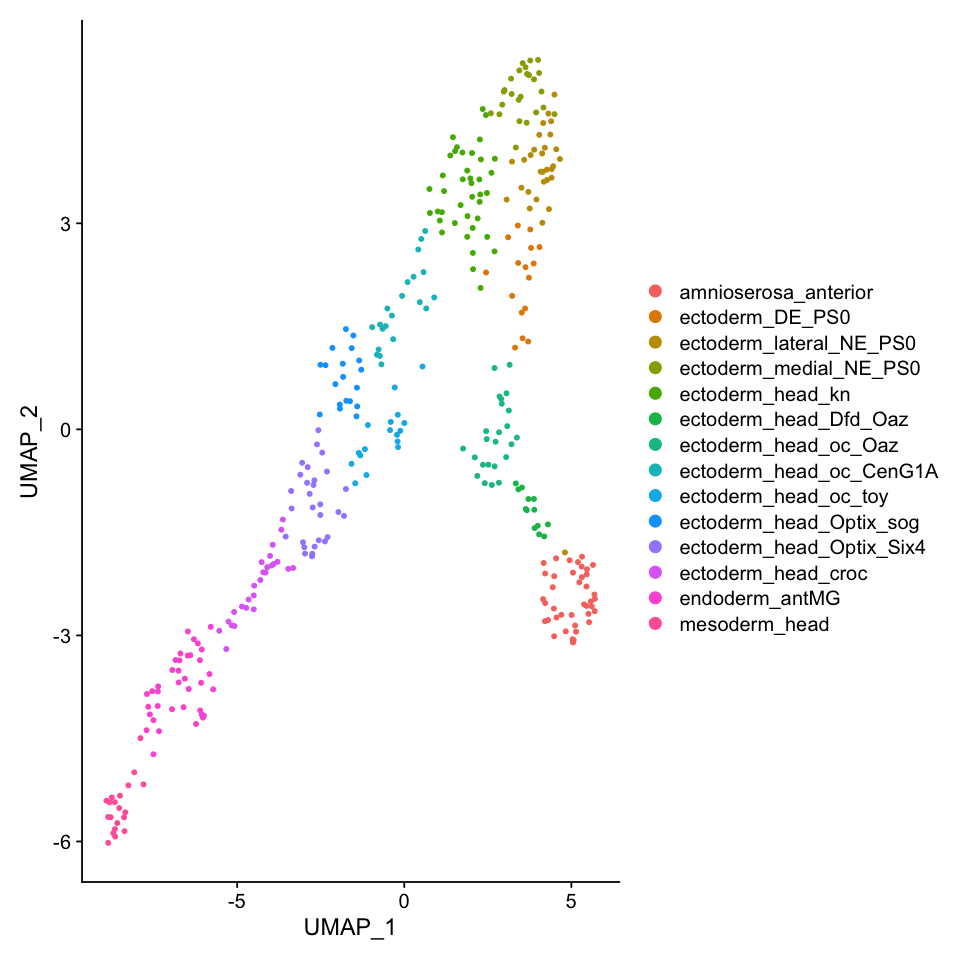

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.head, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/03_head_subclutering_Set2/head_umap2.eps", dpi = 300)

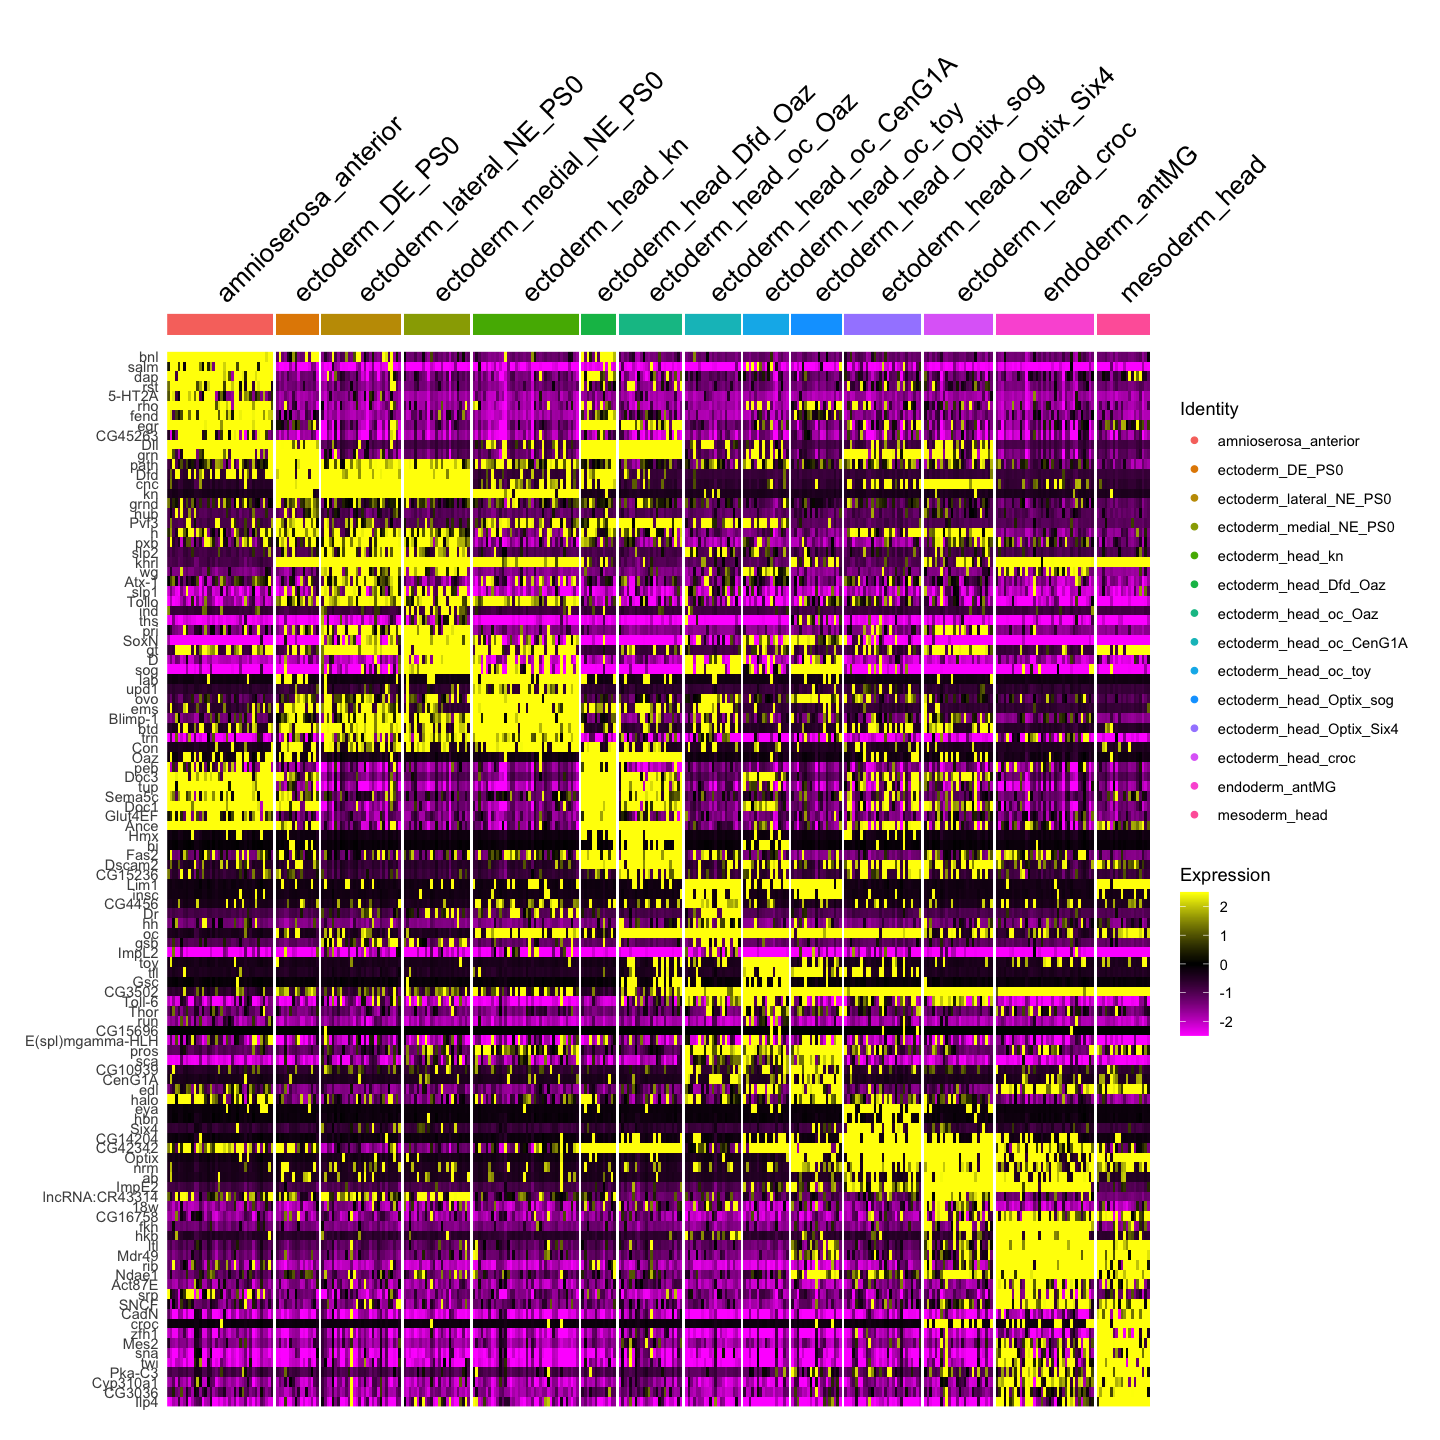

In [24]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.head, features = c(all.markers.head.top10$gene))
fig
ggsave(fig, file = "./figures/03_head_subclutering_Set2/head_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

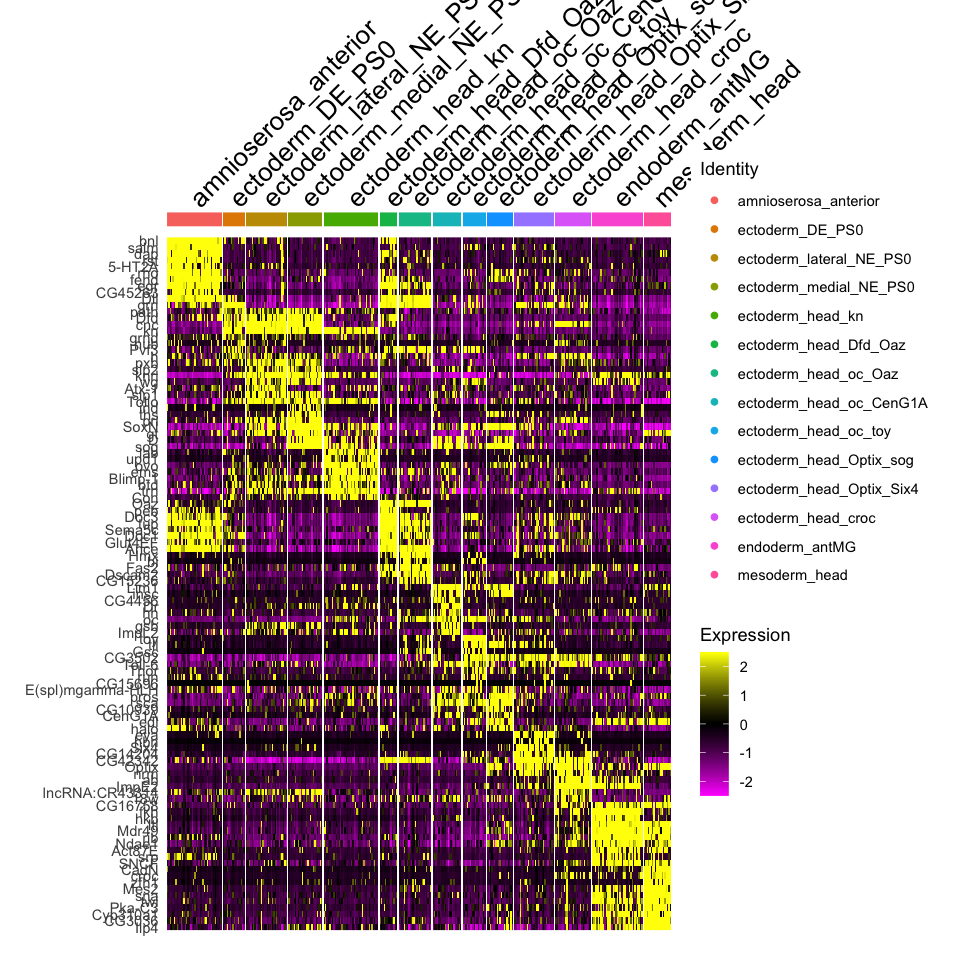

In [25]:
DefaultAssay(seu.head) <- 'RNA'
seu_renorm <- suppressWarnings(SCTransform(seu.head, vars.to.regress = c("percent.mt", "percent.rRNA"), verbose = FALSE))
options(repr.plot.width=8, repr.plot.height=8)
fig <- DoHeatmap(seu_renorm,  features = c(all.markers.head.top10$gene))
fig
ggsave(fig, file = "./figures/03_head_subclutering_Set2/head_manualID_heatmap_renorm.eps", dpi = 300,  width = 12, height = 8)

In [26]:
seu.wo.head <- subset(seu_HQC, idents = c(8,12), invert = TRUE)
seu.wo.head

An object of class Seurat 
28364 features across 4540 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [27]:
seu.wo.head$manual_ID = 'others'
seu.merged <- merge(seu.head, seu.wo.head)
seu_HQC$manual_ID <- seu.merged$manual_ID

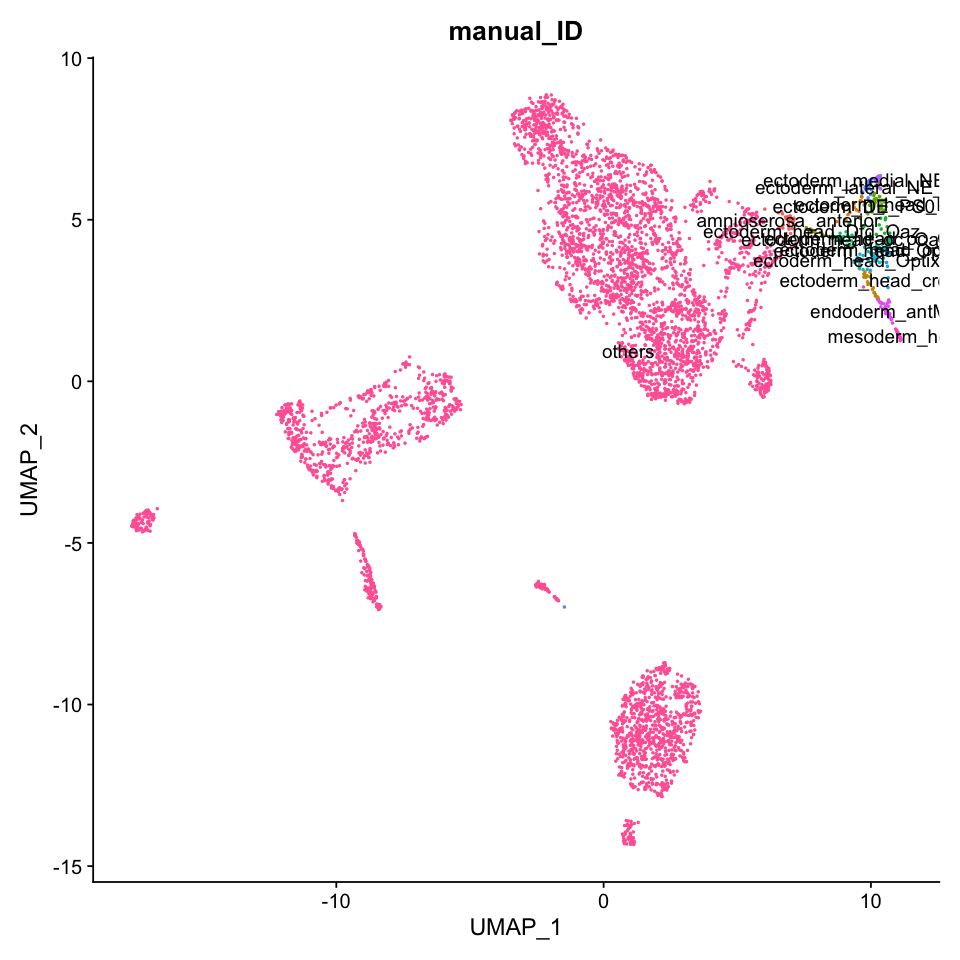

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, group.by='manual_ID') + NoLegend()

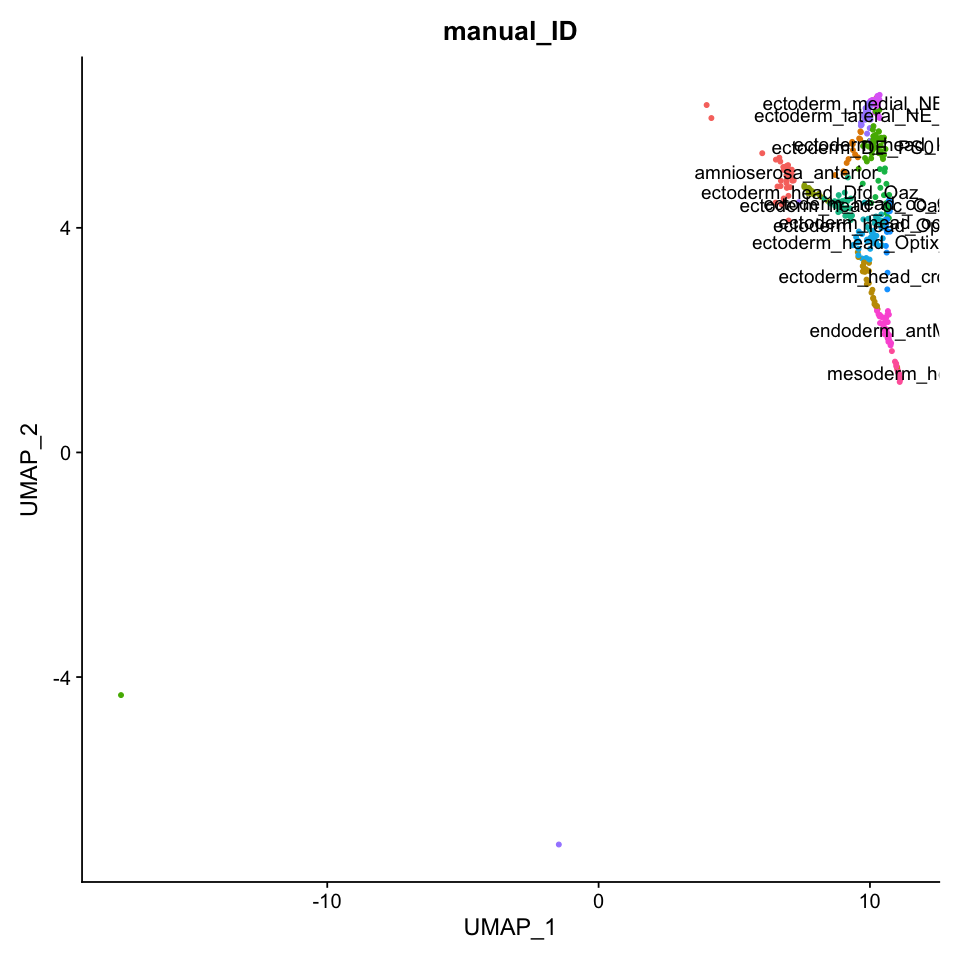

In [29]:
Idents(seu_HQC) <- seu_HQC$manual_ID
seu.plot <- subset(seu_HQC, ident = 'others', invert = TRUE)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.plot, reduction = 'umap', label = TRUE, group.by='manual_ID') + NoLegend()

In [30]:
saveRDS(object = seu.head, file = '../../data/seurat_object/Set2/subclustering/seu_head_subclustered.obj')

In [31]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv